In [80]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn . tree import DecisionTreeClassifier , plot_tree
from sklearn . model_selection import train_test_split, cross_val_score
from sklearn . metrics import accuracy_score
from sklearn . preprocessing import LabelEncoder
import matplotlib . pyplot as plt
import seaborn as sns

In [25]:
df = sns.load_dataset('titanic')
features = ['pclass', 'sex', 'age', 'fare', 'embarked']
df = df[features + ['survived']]

df.head()

,pclass,sex,age,fare,embarked,survived
0,3,male,22.0,7.2500,S,0
1,1,female,38.0,71.2833,C,1
2,3,female,26.0,7.9250,S,1
3,1,female,35.0,53.1000,S,1
4,3,male,35.0,8.0500,S,0


In [27]:
df.isnull().sum()

pclass        0
sex           0
age         177
fare          0
embarked      2
survived      0
dtype: int64

In [28]:
# Step 3: Handle missing values
df['age'].fillna(df['age'].median(), inplace = True )
df['embarked'].fillna (df['embarked'].mode()[0], inplace = True )

C:\Users\USER\AppData\Local\Temp\ipykernel_10848\1464981565.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace = True )
C:\Users\USER\AppData\Local\Temp\ipykernel_10848\1464981565.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [32]:
# Step 4: Convert categorical features to numeric
label_encoders = {}
for col in ['sex', 'embarked']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [35]:
# Step 5: Split features and labels
X = df [ features ]
y = df ['survived']

In [36]:
# Step 6: Train / test split
X_train , X_test , y_train , y_test = train_test_split (X , y ,test_size =0.2 ,random_state =42)

In [48]:
# Step 7: Train Decision Tree Classifier
clf = DecisionTreeClassifier ( max_depth = None , random_state =42)
clf . fit ( X_train , y_train )

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [49]:
# Step 8: Evaluate the model
y_pred = clf . predict ( X_test )
accuracy = accuracy_score ( y_test , y_pred )
depth = clf . get_depth ()
print ( f" Decision Tree Accuracy : { accuracy :.2f}")
print ( f" Tree Depth : { depth }")
print ( f" Number of Leaves : {clf. get_n_leaves ()}")

 Decision Tree Accuracy : 0.77
 Tree Depth : 20
 Number of Leaves : 176


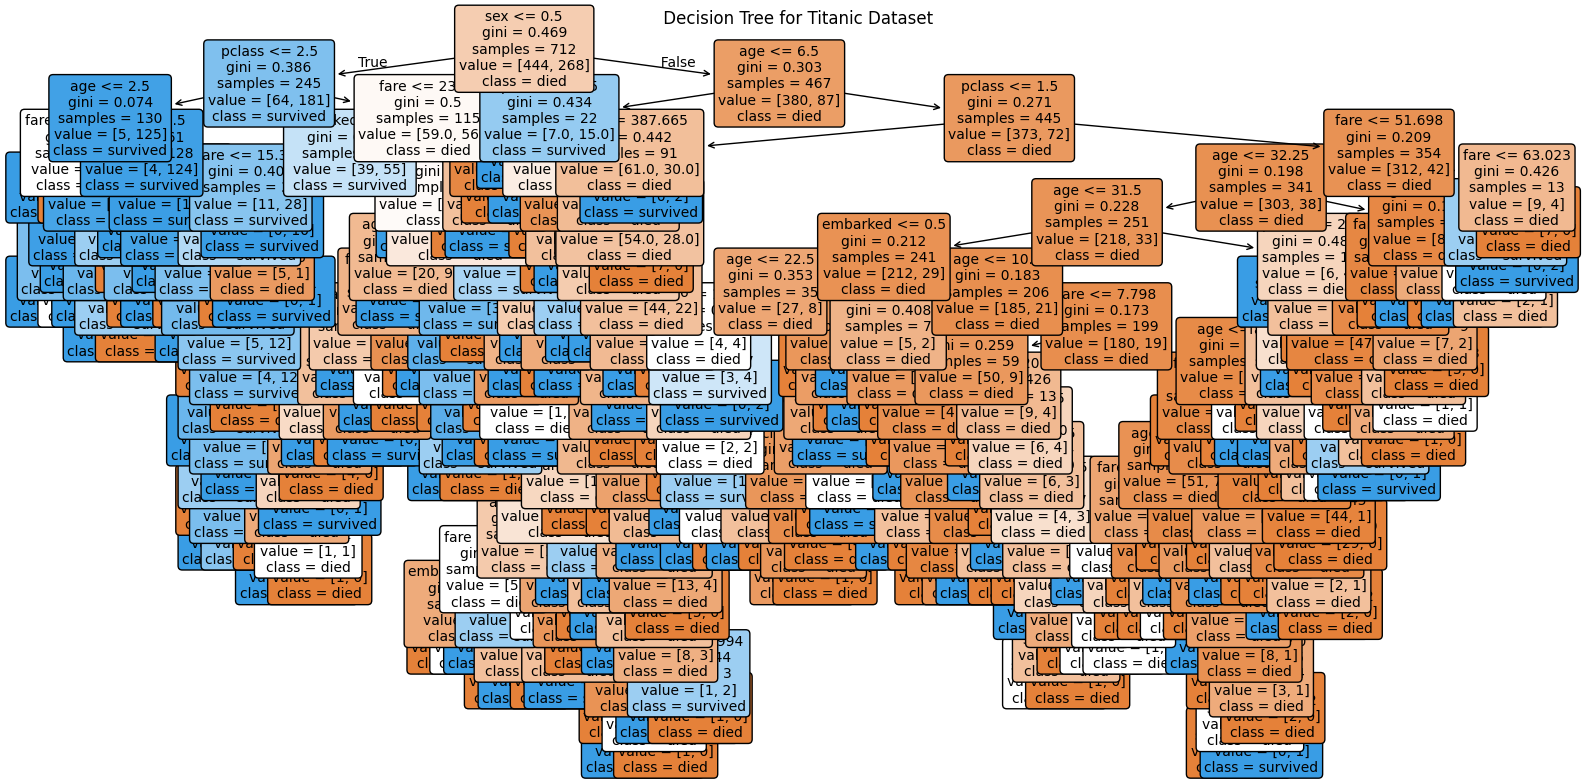

In [50]:
# Step 9: Visualize the Decision Tree
plt.figure( figsize =(16 , 8) )
plot_tree( clf ,feature_names = features ,class_names =[ 'died', 'survived'] ,filled = True ,rounded = True ,fontsize =10)
plt.title(" Decision Tree for Titanic Dataset ")
plt.tight_layout()
plt.savefig("titanic_decision_tree.png")
plt.show()

In [56]:
iris = sns.load_dataset('iris')

In [57]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [66]:
X = iris.iloc[:, :-1]
y = iris.iloc[:,-1]

In [67]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [88]:
model = DecisionTreeClassifier(max_depth = None , random_state =42)
model.fit(X_train_iris, y_train_iris)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [95]:
y_pred_iris = model.predict(X_test_iris)
y_pred_iris

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [90]:
print("accuracy score = ", accuracy_score ( y_test_iris , y_pred_iris )*100,"%")

accuracy score =  100.0 %


In [91]:
cv_scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')

print("Cross-validation accuracy scores:", cv_scores)
print("Mean cross-validation accuracy:", np.mean(cv_scores))

Cross-validation accuracy scores: [1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 0.93333333 1.         1.        ]
Mean cross-validation accuracy: 0.9533333333333334


TypeError: can only concatenate str (not "numpy.int64") to str

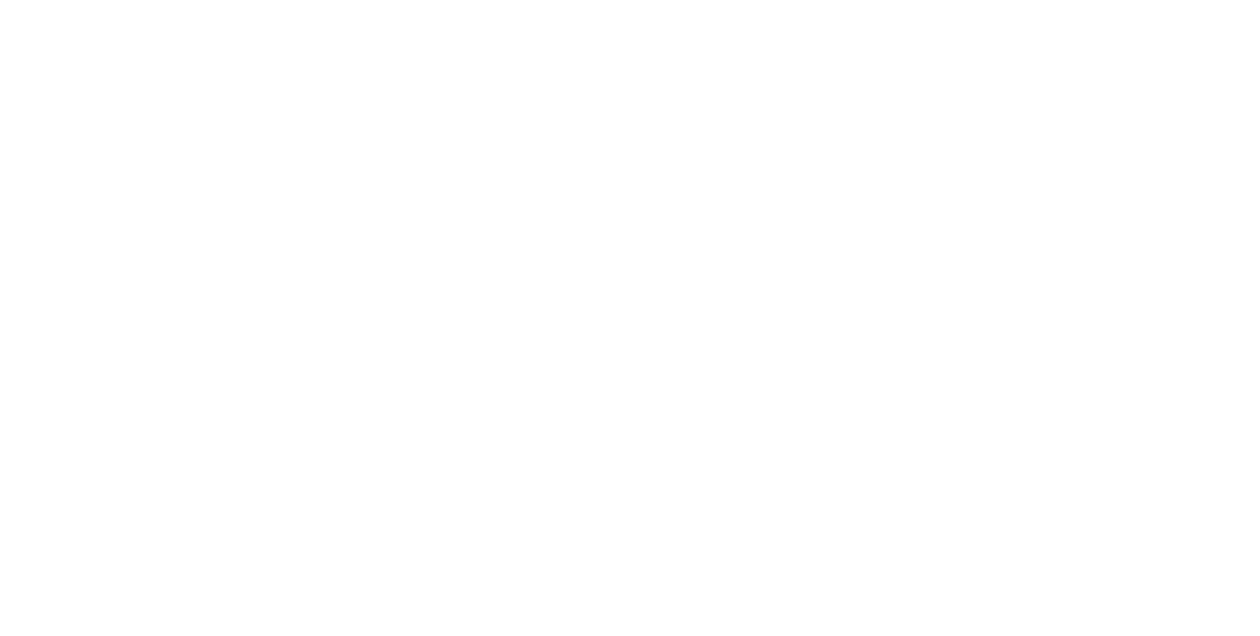

In [94]:
# Step 9: Visualize the Decision Tree
plt.figure(figsize=(16, 8))
plot_tree(
    clf,
    feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
    class_names=list(clf.classes_),  # convert to list
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for iris Dataset")
plt.tight_layout()
plt.savefig("iris_decision_tree.png")
plt.show()